In [3]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action="ignore")

# Dataset Loading

In [4]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Dropping Columns

In [8]:
# Dropping unnecessary columns
drop_cols=["instant","dteday","casual","registered"]
df=df.drop(drop_cols,axis=1)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df.shape

(730, 12)

## Missing value check

In [11]:
# Checking missing values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# EDA

In [12]:
# Checking unique values for each columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [13]:
# renaming few columns for better readability

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [14]:
# Dividing each columns into categorical and continuous columns
cat_cols= ['season','year','month','holiday','weekday','workingday','weathersit']
cont_cols= ['temp','atemp','humidity','windspeed' ]
target_col= ['cnt']

len(cat_cols)+len(cont_cols)+len(target_col)

12

### Univariate Analysis

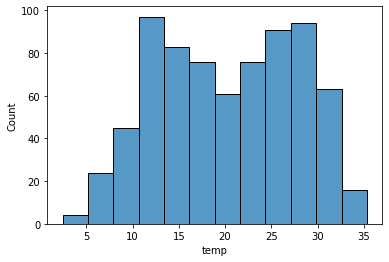

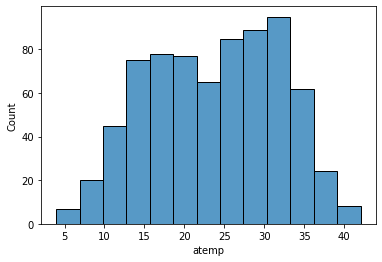

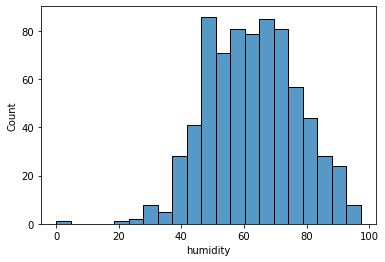

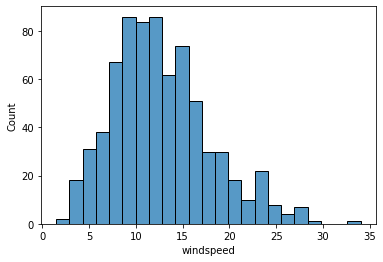

In [15]:
for i in cont_cols:
    sns.histplot(df[i])
    plt.show()

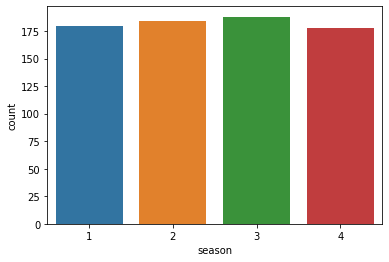

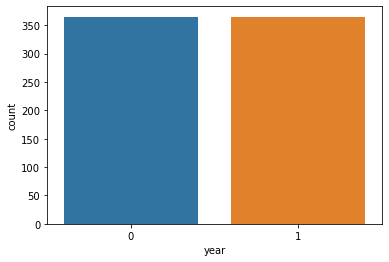

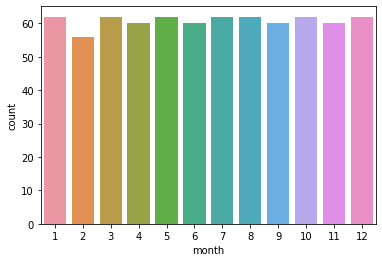

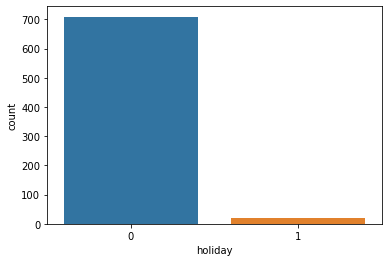

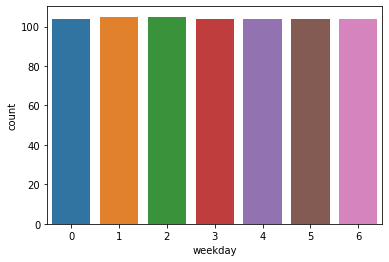

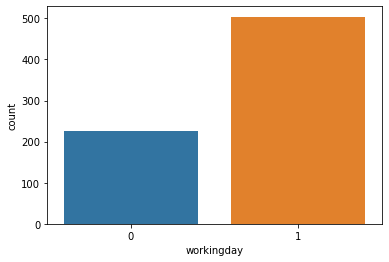

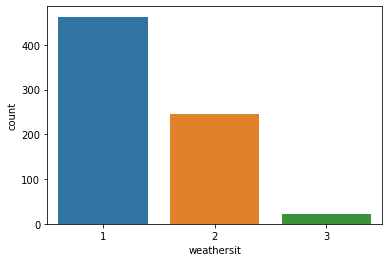

In [16]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

### Bivariate Analysis

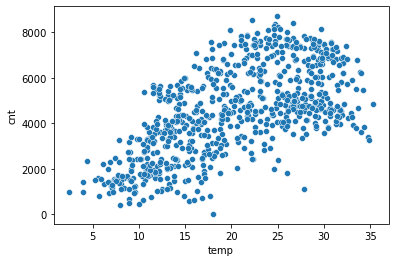

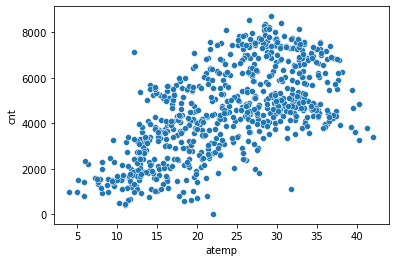

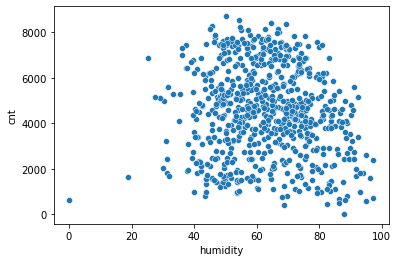

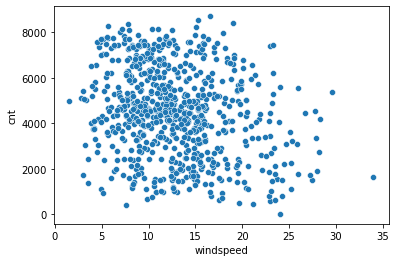

In [17]:
for i in cont_cols:
    sns.scatterplot(df[i],df["cnt"])
    plt.show()

### Multivariate Analysis

<AxesSubplot:>

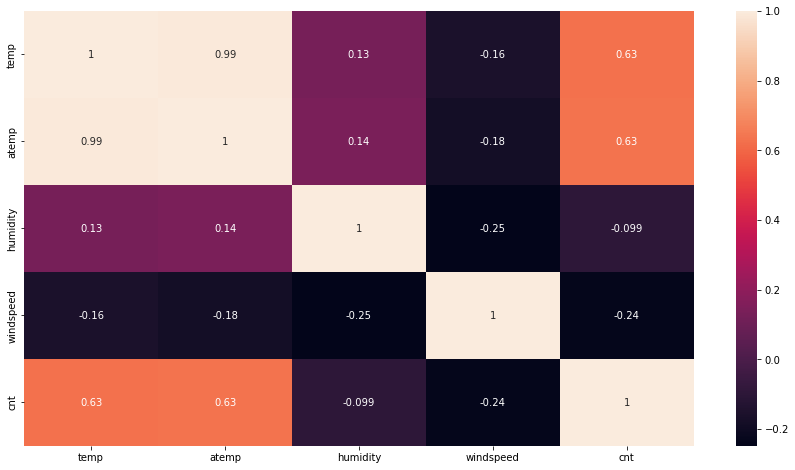

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)

<Figure size 1296x432 with 0 Axes>

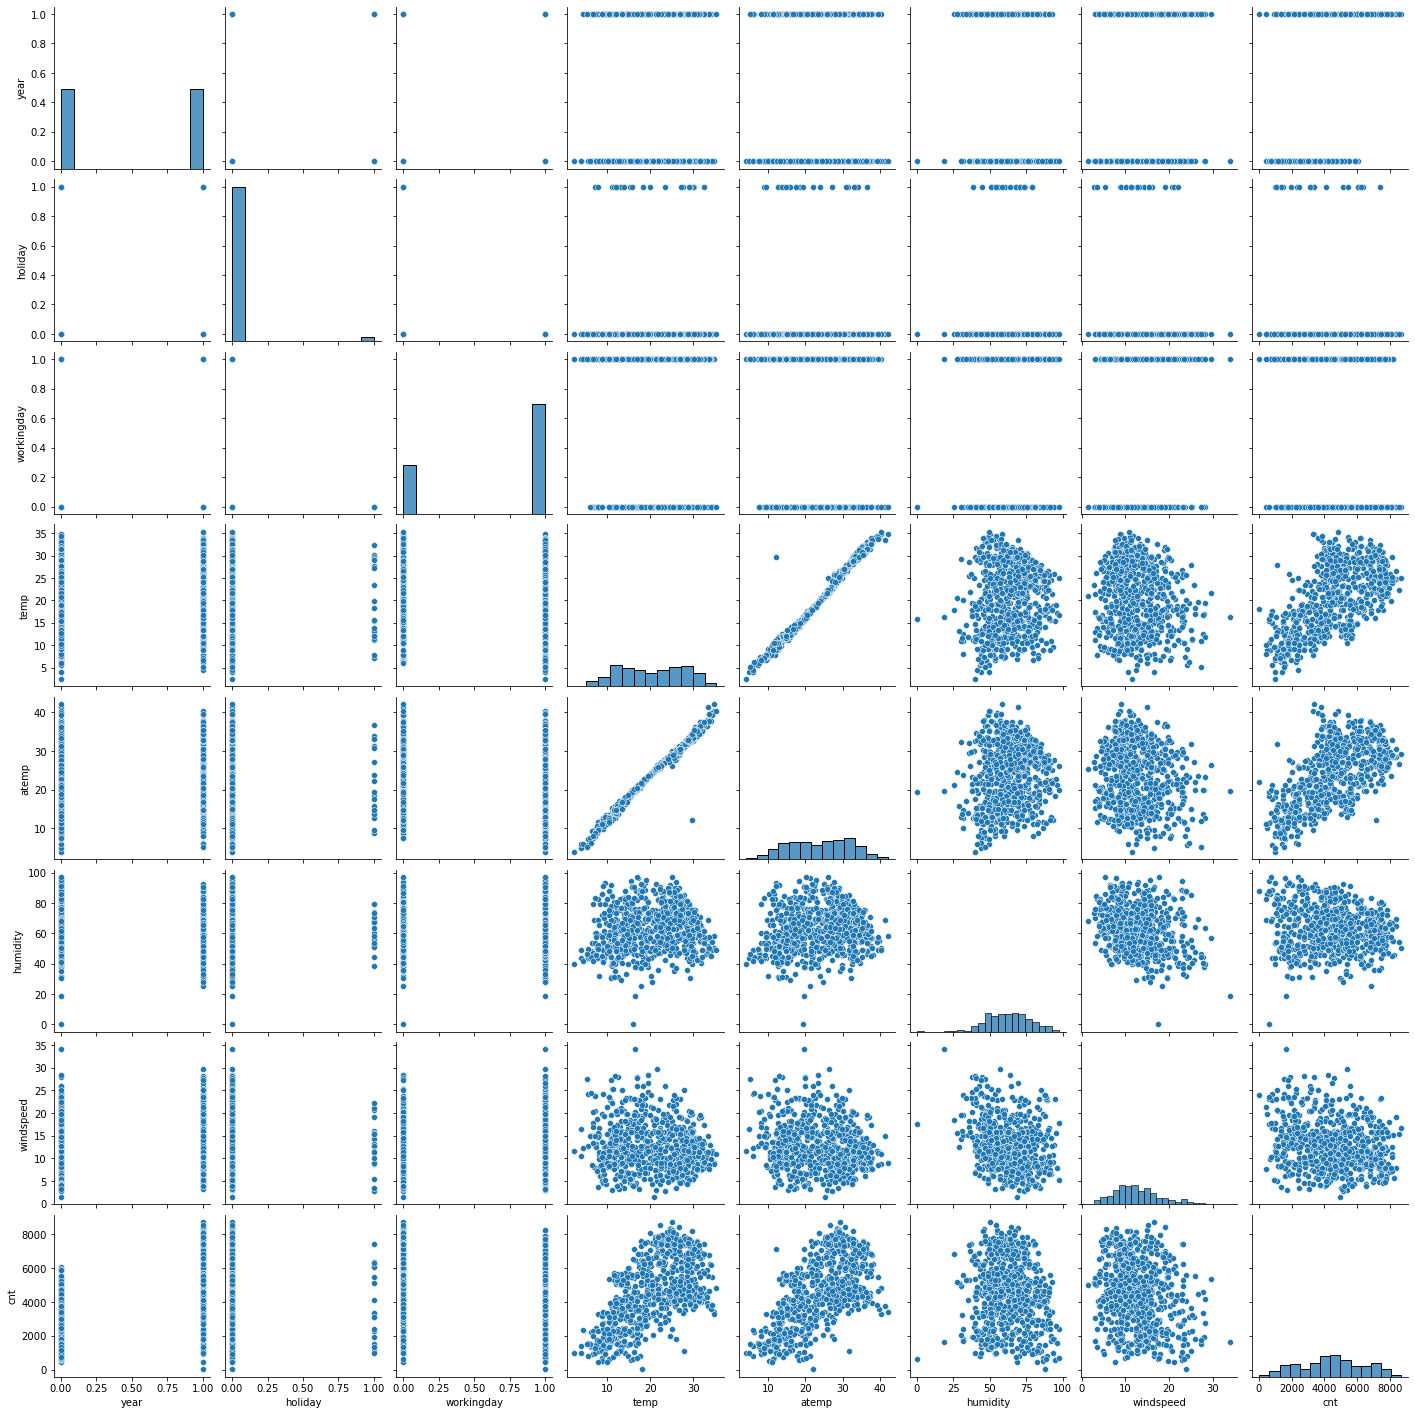

In [83]:
plt.figure(figsize=(18,6))
sns.pairplot(df)
plt.show()

# Pre-processing Step

## Dummy Variable Creation

In [19]:
# Checking columns are binary or non-binary
df[cat_cols].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

### Mapping all the columns for better readability

In [20]:
# Mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [21]:
dum_1= pd.get_dummies(df["season"],drop_first=True)
dum_1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
# Mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [23]:
dum_2= pd.get_dummies(df["month"],drop_first=True)
dum_2.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [24]:
# Mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [25]:
dum_3= pd.get_dummies(df["weekday"],drop_first=True)
dum_3.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [26]:
# Mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Cloudy',3:'Light_rain/snow',4:'Heavy_rain/snow'})

In [27]:
dum_4= pd.get_dummies(df["weathersit"],drop_first=True)
dum_4.head()

,Cloudy,Light_rain/snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [28]:
# Combining all the dummies together in our data
df1=pd.concat([df,dum_1,dum_2,dum_3,dum_4],axis=1)
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Cloudy,Light_rain/snow
0,spring,0,jan,0,mon,1,Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,jan,0,tue,1,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


### Dropping the unnecessary columns

In [29]:
column_drop = ['season','month','weekday','weathersit']
df1=df1.drop(column_drop,axis=1)

In [30]:
df1.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Cloudy,Light_rain/snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Train-test Split

In [31]:
x=df1.drop(["cnt"],axis=1)
y= df1["cnt"]

In [32]:
# Importing Train-test Split command
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100) 

In [33]:
X_train.shape

(511, 29)

In [34]:
X_test.shape

(219, 29)

## Scaling

In [35]:
# Standardization
X_train=(X_train-X_train.mean())/X_train.std()

In [36]:
X_test=(X_test-X_test.mean())/X_test.std()

## Modeling

### Feature Selection

### Building linear regression model using RFE

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15) # we have to select from 10-20

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True])

In [38]:
selected_features=list(X_train.columns[selector.support_])
selected_features

['year',
 'holiday',
 'temp',
 'humidity',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'dec',
 'jan',
 'july',
 'nov',
 'sep',
 'Cloudy',
 'Light_rain/snow']

In [39]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [40]:
# Adding Constant to traim-test data

import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

## Building Linear Regerssion model

In [41]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 03 May 2023   Prob (F-statistic):          2.29e-189
Time:                        20:14:32   Log-Likelihood:                -4120.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.516    130.121      0.000    4423.487    4559.120
year             1003.9928     35.174     28.543      0.000     934.884    1073.102
holiday          -124.9183     35.109     -3.558      0.000    -193.899     -55.938
temp              943.1881     72.656     12.982      0.000     800.436    1085.940
humidity         -206.2831     47.912     -4.305      0.000    -300.419    -112.148
windspeed        -278.4108     38.068     -7.314      0.000    -353.205    -203.617
spring           -229.1853     79.345     -2.888      0.004    -385.081     -73.290
summer            157.7269     57.527      2.742      0.006      44.700     270.754
winter            389.8711     67.601      5.767      0.000     257.050     522.692
dec               -89.3965     42.238     -2.117      0.035    -172.384      -6.409
jan              -107.7763     44.750     -2.408      0.016    -195.699     -19.854
july             -128.1185     42.154     -3.039      0.002    -210.941     -45.296
nov               -99.6589     45.777     -2.177      0.030    -189.600      -9.718
sep               177.1436     39.954      4.434      0.000      98.643     255.644
Cloudy           -225.8307     43.235     -5.223      0.000    -310.777    -140.884
Light_rain/snow  -362.9611     38.814     -9.351      0.000    -439.222    -286.700
==============================================================================
Omnibus:                       67.308   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.984
Skew:                          -0.686   Prob(JB):                     4.06e-36
Kurtosis:                       5.402   Cond. No.                         5.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building linear regression model using VIF

In [42]:
# Importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,year,1.036450
2,holiday,1.032604
3,temp,4.422225
4,humidity,1.923032
5,windspeed,1.213977
6,spring,5.274058
7,summer,2.772316
8,winter,3.828364
9,dec,1.494529


In [43]:
# Dropping column which has p-value greater than 0.05

X_train_sm=X_train_sm.drop(["spring"],axis=1) 
X_test_sm=X_test_sm.drop(["spring"],axis=1)

In [44]:
x_train_sm=sm.add_constant(X_train)
x_test_sm=sm.add_constant(X_test)

In [45]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 03 May 2023   Prob (F-statistic):          1.00e-188
Time:                        20:14:51   Log-Likelihood:                -4124.3
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     496   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.771    129.169      0.000    4422.987    4559.620
year              997.9523     35.371     28.214      0.000     928.457    1067.448
holiday          -129.7010     35.328     -3.671      0.000    -199.113     -60.289
temp             1087.7437     53.060     20.500      0.000     983.495    1191.993
humidity         -221.4696     47.974     -4.616      0.000    -315.726    -127.213
windspeed        -290.8582     38.102     -7.634      0.000    -365.719    -215.998
summer            272.8241     41.797      6.527      0.000     190.703     354.946
winter            521.8969     50.174     10.402      0.000     423.317     620.477
dec               -74.9680     42.251     -1.774      0.077    -157.980       8.044
jan              -117.1732     44.960     -2.606      0.009    -205.510     -28.837
july             -104.9261     41.687     -2.517      0.012    -186.831     -23.021
nov               -75.6154     45.346     -1.668      0.096    -164.708      13.478
sep               212.3352     38.332      5.539      0.000     137.023     287.648
Cloudy           -213.9569     43.356     -4.935      0.000    -299.142    -128.772
Light_rain/snow  -353.7454     38.968     -9.078      0.000    -430.309    -277.182
==============================================================================
Omnibus:                       58.925   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.854
Skew:                          -0.653   Prob(JB):                     2.10e-27
Kurtosis:                       5.015   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Dropping column which has p-value greater than 0.05

X_train_sm=X_train_sm.drop(["dec"],axis=1) 
X_test_sm=X_test_sm.drop(["dec"],axis=1)

In [47]:
x_train_sm=sm.add_constant(X_train)
x_test_sm=sm.add_constant(X_test)

In [48]:
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 03 May 2023   Prob (F-statistic):          3.28e-189
Time:                        20:15:01   Log-Likelihood:                -4125.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     497   BIC:                             8339.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.846    128.890      0.000    4422.840    4559.767
year              997.6154     35.447     28.144      0.000     927.972    1067.259
holiday          -130.4737     35.402     -3.685      0.000    -200.030     -60.918
temp             1118.9907     50.160     22.308      0.000    1020.439    1217.542
humidity         -228.8751     47.895     -4.779      0.000    -322.977    -134.774
windspeed        -286.1075     38.090     -7.511      0.000    -360.944    -211.271
summer            282.9256     41.497      6.818      0.000     201.394     364.457
winter            496.8162     48.246     10.298      0.000     402.025     591.607
jan               -95.9863     43.439     -2.210      0.028    -181.334     -10.639
july             -108.0525     41.740     -2.589      0.010    -190.061     -26.044
nov               -45.0435     42.035     -1.072      0.284    -127.632      37.545
sep               219.5295     38.199      5.747      0.000     144.478     294.581
Cloudy           -209.3694     43.373     -4.827      0.000    -294.586    -124.153
Light_rain/snow  -346.5340     38.839     -8.922      0.000    -422.844    -270.224
==============================================================================
Omnibus:                       54.816   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.694
Skew:                          -0.623   Prob(JB):                     9.19e-25
Kurtosis:                       4.910   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Dropping column which has p-value greater than 0.05

X_train_sm=X_train_sm.drop(["nov"],axis=1) 
X_test_sm=X_test_sm.drop(["nov"],axis=1)

In [50]:
x_train_sm=sm.add_constant(X_train)
x_test_sm=sm.add_constant(X_test)

In [51]:
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 03 May 2023   Prob (F-statistic):          3.84e-190
Time:                        20:15:10   Log-Likelihood:                -4126.5
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     498   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.851    128.871      0.000    4422.830    4559.777
year              997.8060     35.452     28.146      0.000     928.153    1067.459
holiday          -134.9324     35.162     -3.837      0.000    -204.016     -65.849
temp             1122.1742     50.079     22.408      0.000    1023.781    1220.567
humidity         -226.5368     47.852     -4.734      0.000    -320.554    -132.519
windspeed        -287.2323     38.081     -7.543      0.000    -362.051    -212.413
summer            283.4797     41.500      6.831      0.000     201.943     365.016
winter            473.6542     43.139     10.980      0.000     388.897     558.412
jan               -93.7210     43.394     -2.160      0.031    -178.980      -8.462
july             -108.8689     41.739     -2.608      0.009    -190.875     -26.862
sep               222.3988     38.111      5.836      0.000     147.521     297.276
Cloudy           -209.4270     43.379     -4.828      0.000    -294.656    -124.198
Light_rain/snow  -345.6344     38.836     -8.900      0.000    -421.937    -269.331
==============================================================================
Omnibus:                       53.561   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.354
Skew:                          -0.612   Prob(JB):                     4.88e-24
Kurtosis:                       4.882   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,year,1.032731
2,holiday,1.015920
3,temp,2.060789
4,humidity,1.881581
5,windspeed,1.191596
6,summer,1.415189
7,winter,1.529198
8,jan,1.547336
9,july,1.431542


In [53]:
x_train_sm=sm.add_constant(X_train)
x_test_sm=sm.add_constant(X_test)

In [54]:
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 03 May 2023   Prob (F-statistic):          3.84e-190
Time:                        20:15:17   Log-Likelihood:                -4126.5
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     498   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.851    128.871      0.000    4422.830    4559.777
year              997.8060     35.452     28.146      0.000     928.153    1067.459
holiday          -134.9324     35.162     -3.837      0.000    -204.016     -65.849
temp             1122.1742     50.079     22.408      0.000    1023.781    1220.567
humidity         -226.5368     47.852     -4.734      0.000    -320.554    -132.519
windspeed        -287.2323     38.081     -7.543      0.000    -362.051    -212.413
summer            283.4797     41.500      6.831      0.000     201.943     365.016
winter            473.6542     43.139     10.980      0.000     388.897     558.412
jan               -93.7210     43.394     -2.160      0.031    -178.980      -8.462
july             -108.8689     41.739     -2.608      0.009    -190.875     -26.862
sep               222.3988     38.111      5.836      0.000     147.521     297.276
Cloudy           -209.4270     43.379     -4.828      0.000    -294.656    -124.198
Light_rain/snow  -345.6344     38.836     -8.900      0.000    -421.937    -269.331
==============================================================================
Omnibus:                       53.561   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.354
Skew:                          -0.612   Prob(JB):                     4.88e-24
Kurtosis:                       4.882   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model is READY
### Now we will test it on test data

### For R-squared 

In [55]:
# Predicted value for train data/ R^2(R-squared) train

predicted_value_train = res5.predict(X_train_sm)

In [56]:
from sklearn.metrics import r2_score 
print("Train Performance:",round(r2_score(y_train, predicted_value_train)*100,2),"%")

Train Performance: 84.12 %


In [57]:
# Predicted value for test data

predicted_value_test = res5.predict(X_test_sm)

In [58]:
from sklearn.metrics import r2_score 
print("Test Performance:",round(r2_score(y_test, predicted_value_test)*100,2),"%")

Test Performance: 80.08 %


### For Adjusted R-squared

In [62]:
# Calculating Adjusted-R^2 value for the train dataset

adjusted_r2 = round(1-(1-r2_score(y_train, predicted_value_train))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print("Train Adjusted R^2: ",round(adjusted_r2*100,2),"%")

Train Adjusted R^2:  83.64 %


In [60]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value_test))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Test Adjusted R^2: ",round(adjusted_r2*100,0),"%")

Test Adjusted R^2:  79.0 %


## Model Visualization/Evaluation

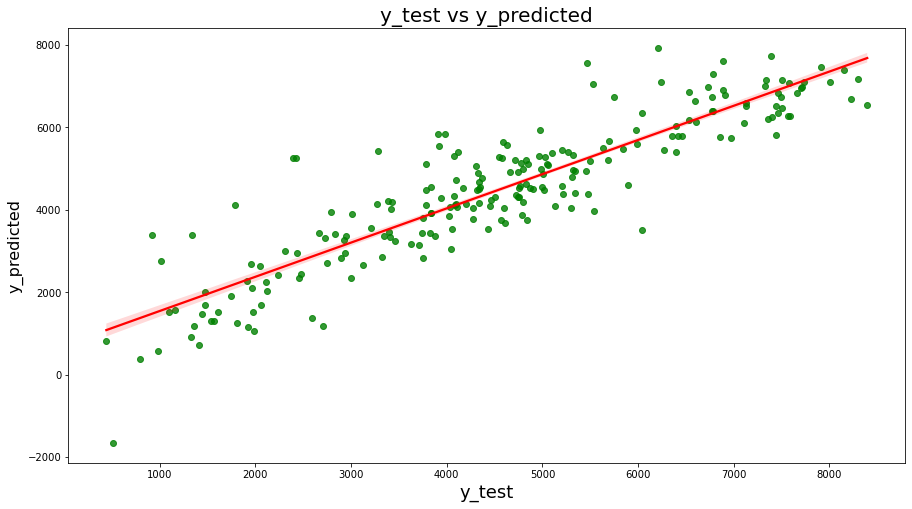

In [65]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=predicted_value_test, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_predicted', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_predicted', fontsize=16)
plt.show()

# Comparison between Train and Test Model

### Train R-squared  : 84.12 %
### Test R-squared  : 80.08 %
### Train Adjusted R-squared  : 83.64 %
### Test Adjusted R-squared  : 79.0 %

##### Since the difference between train and test model is less than 5 %, it can be considered as the best model.

# The best-fit line equation thus formed is :
### y = 4491.3033 + 997.8060*year + (-134.9324)*holiday + 1122.1742*temp + (-226.5368)*humidity + (-287.2323)*windspeed + 283.4797*summmer + 473.6542*winter + (-93.7210)*jan + (-108.8689)*july + 222.3988*sep + (-209.4270)*Cloudy + (-345.6344)*Light_rain/snow

# We can see the demand for bike-sharing system depending on below variables:
### year , holiday , temp , humidity , windspped, summer , winter , January , July , Sep , Cloudy, Light_rain/snow are the main factors for demands od bikes.
### Demand for bike-sharing system decreases at the time of holidays mostly in January and July when its Humid, Cloudy, has High windspeed and Light rain or snow.
### Demand increase in month of September, December when winter is going on and also at the time of summer where temprature is high.
### Year also plays important role for increase in demands of bike-sharing system.